#F06 - Backpropagation no Dataset Iris

Yuri Oliveira Alves

### Objetivos Atingidos:
- [x] Faça a leitura dos dados, criando o par de matrizes X e Y no formato array do numpy, com 150 linhas cada, onde X têm 4 colunas e Y tem 3 colunas. X é o conjunto de dados de largura e comprimento de sépalas e pétalas, e Y é a classe da planta no formato one-hot.
- [x] Embaralhe e separe 10% dos dados para validação, com o cuidado de manter os pares correspondentes no processo.
- [x] Crie uma classe que implemente uma rede do tipo perceptron, com três camadas, tendo 5 neurônios na primeira camada, 4 na segunda e 3 na saída. Utilize a função de ativação sigmoide. A rede deve inicializar todos pesos e biases com valores aleatórios distribuídos uniformemente entre -1 e 1. Implemente o código que realiza a propagação direta das sinapses, recebendo uma amostra x (uma linha de X dos dados de treinamento ou validação) e calcule uma saída Y no formato correto. Tome o cuidado para usar a função reshape para transformar os dados de entrada para o formato de vetor coluna, mantendo o código compatível com a notação apresentada nas videoaulas. No contrutor essa classe deve definir também um passo de aprendizagem eta.
- [x] Implemente o método que executa o algoritmo backpropagation. Esse método deve receber um par de entradas e saídas desejadas, transformá-los para o formato coluna usando a função reshape, e com base nisso calcular os deltas da camada de saída, e a partir desse, propagar o resultado calculando os deltas das camadas anteriores, uma a uma, da saída até a entrada. Garanta que as dimensões dos vetores e matrizes estejam corretas. Em seguida calcule e efetue a correção dos valores dos pesos e biases de cada camada utilizando o valor de passo de aprendizagem eta definido no construtor.
- [x] Escreva código que crie um objeto da classe perceptron e faça o treinamento da rede neural com base nos dados separados para trenamento.
- [x] Grave o valor do erro ao longo do treinamento e gere um gráfico demonstrando como ele se reduziu a cada interação.

In [ ]:
#Importação das bibliotecas necessárias
import numpy as np
from google.colab import files
import io
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
#Remove todos arquivos do tipo .csv
!rm -f *.csv

In [ ]:
#Importação do dataset
d = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
#Carrega p/ MEM
f = io.BytesIO(d['Iris.csv'])

#Retorna o ponteiro de leitura sempre para o inicio do arquivo
f.seek(0) 

#Leitura de todas as linhas 
lines = f.readlines()

In [ ]:
# INPUT
X = np.zeros((len(lines)-1,4)) # 4 colunas

#OUTPUT
Y = np.zeros((len(lines)-1,3)) # 3 colunas (one-hot)

#ONE-HOT CATEG
cat = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [ ]:
for i, line in enumerate(lines[1:]):
  #Decode
  s = line.decode()[:-1]

  #Split 
  _,sl,sw,pl,pw,sp = s.split(',')

  #Altera o tipo
  sl = float(sl)
  sw = float(sw)
  pl = float(pl)
  pw = float(pw)
  
  #Salva os dados de entrada
  X[i:] = np.array([sl,sw,pl,pw])
  #Saida esperada
  Y[i:] = (cat == sp).astype('float')  

In [ ]:
# Aqui criamos uma lista de índices
# embaralhados
indexes = list(range(150))
random.shuffle(indexes)

# Essa variável T indica quantas amostras
# serão usadas para treinamento. As demais
# serão usadas para validação
T = 140

# Aqui preparamos as matrizes dos pares
# de dados de treinamento e validação.
Xt = np.zeros((T,4))
Yt = np.zeros((T,3))
Xv = np.zeros((150-T,4))
Yv = np.zeros((150-T,3))

# Aqui preenchemos as matrizes com os
# respectivos valores
for i in range(0,T):
  Xt[i,:] = X[indexes[i],:]
  Yt[i,:] = Y[indexes[i],:]
for i in range(0,150-T):
  Xv[i,:] = X[indexes[T+i],:]
  Yv[i,:] = Y[indexes[T+i],:]

In [ ]:
# Função de ativação
def sigmoid(s, deriv=False):
    if (deriv == True):
        return s * (1 - s)
    return 1/(1 + np.exp(-s))

In [ ]:
# Função softmax
def softmax(x):
  ex = np.exp(x*10)
  s = np.sum(ex)
  return ex/s

In [ ]:
#Definicação da rede
#input_size - numero de neuronios na camada de entrada
#hidden_layer - lista contendo o numero de neuronios em cada camada oculta
#output_layer - numero de neuronios da camada de saida
class perceptron:
  def __init__(self,input_size,hidden_layer,output_layer):
    self.input_size = input_size
    self.hidden_layer = hidden_layer
    self.output_layer = output_layer

    #Inicialização randomica dos pesos e bias para as camadas ocultas
    pLayer = self.input_size
    self.wh = [] 
    self.bh = []

    #e = iterator
    #it = values
    for e,it in enumerate(self.hidden_layer):
      self.wh.append(np.random.random((it,pLayer)) * 2.0 - 1.0)
      self.bh.append(np.random.random((it,1)) * 2.0 - 1.0)
      pLayer = it
    
    #Inicialização randomica dos pesos e bias para a ultima camada
    self.wo = np.random.random((self.output_layer,self.hidden_layer[-1])) * 2.0 - 1.0
    self.bo = np.random.random((self.output_layer,1)) * 2.0 - 1.0

    #Definição do passo de aprendizagem
    self.eta = 0.05

  def forward(self,x):
    #Ajustar o shape da entrada para que seja um 
    #vetor coluna
    x = np.reshape(x,(self.input_size,1))
    
    #Calculo de S e Z, das camadas ocultas
    self.sh = []
    self.zh = []
    pLayer = x
      
    #Iterate
    for e,whl in enumerate(self.wh):
      #Sh
      tmpSh = np.dot(whl, pLayer) + self.bh[e]
      #Zh 
      tmpZh = sigmoid(tmpSh) #Função de ativação sig 

      self.sh.append(tmpSh)
      self.zh.append(tmpZh)

      #Atualiza a camada, para que seja calculado 
      #o prox Sh, em relação ao Zh da camada anterior
      pLayer = tmpZh
    
    #Calculo de S e Z, para a camada de saida
    #So
    self.so = np.dot(self.wo,self.zh[-1]) + self.bo
    #Zo 
    self.zo = sigmoid(self.so) #Função de ativação sig 

    #Retorna a saida calculada 
    return softmax(self.zo)
      
  def train(self,Xt,Yt):
    Err = 0

    for n in range(len(Xt)):
      #Converte a entrada p/ array do np
      X = np.asarray(Xt[n])
      X = np.reshape(X,(self.input_size,1))

      Y = Yt[n]
      Y = np.reshape(Y,(self.output_layer,1))

      #Retorno da saida da rede para a entrada X,
      #Salvando em ŷ
      self.yhat = self.forward(X)

      #RMSE
      Err = sqrt(mean_squared_error(Y,self.yhat))

      #Ajustes dos pesos e bias
      self.backpropagation(X, Y)

    #Retorna o Erro
    return Err

  def backpropagation(self,X,Y):
    #Calculo do delta para a camada de saida
    #((Z^L)-ŷ) * drv(S^L)
    dout = (self.yhat - Y) * (sigmoid(self.zo, True))
    #Derivada do erro p Wo
    dEwo = np.dot(dout, self.zh[-1].T)

    # Atualizacao dos pesos e bias da saida
    self.bo = self.bo - (self.eta*dout)
    self.wo = self.wo - (self.eta*dEwo)
      
    #Calculo do delta para as demais camadas
    #(W^(l+1)).T x delta^(l+1)) * drv(S^l)
    pLayerW = self.wo
    pLayerD = dout
    pZ = len(self.zh)-1

    dHi = [] #Delta
    dEwh = [] #Derivada do erro p W

    #reversed(self.zh), "inverte" o vetor
    #start=1, força que e, inicie em 1 e não 0
    for e,it in enumerate(reversed(self.zh),start=1):
      tmpDelta = (np.dot(pLayerW.T,pLayerD)) * (sigmoid(it,True))
      dHi.append(tmpDelta)

      #Derivada do erro p W
      if(pZ>0):
        tmpDerr = np.dot(tmpDelta, (self.zh[pZ-1]).T)
      else:
        tmpDerr = np.dot(tmpDelta, (X.T))

      #Atualiza iteração
      pZ -=1
      dEwh.append(tmpDerr)

      #Atualiza camadas
      pLayerW = self.wh[-e] #-e força que seja de tras para frente
      pLayerD = tmpDelta

      #Ajustes dos pesos e bias
      self.bh[-e] = self.bh[-e] - (self.eta*tmpDelta)
      self.wh[-e] = self.wh[-e] - (self.eta*tmpDerr)

In [ ]:
#Definindo a rede
n_entradas = 4
c_ocultas = [5,4]
n_saidas = 3

# Criando a rede neural
p = perceptron(n_entradas, c_ocultas, n_saidas)
Errl = []

# Treino 10K
for i in range(10000):
  Err = p.train(Xt,Yt)
  #A cada 1000, print do erro calculado
  if not (i % 1000) or i == 0:
    print('RMSE = ',Err)
    Errl.append(Err)

RMSE =  0.4549413819557136
RMSE =  0.002034438030732635
RMSE =  0.0007449234154523754
RMSE =  0.0004189253046858303
RMSE =  0.0002955719886531263
RMSE =  0.0002393208184249231
RMSE =  0.00022516753380949375
RMSE =  0.00021899681117652434
RMSE =  0.000212019308446969
RMSE =  0.00020438950005395996


No handles with labels found to put in legend.


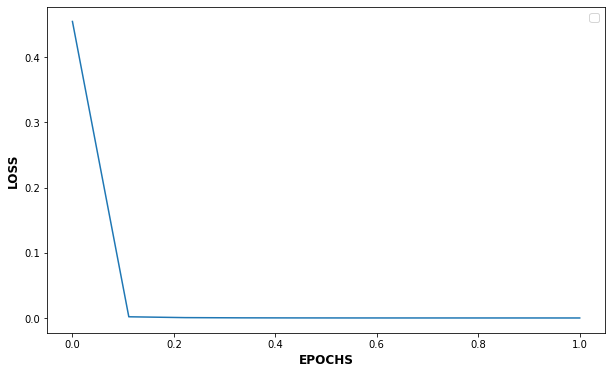

In [ ]:
#Plot the Loss function
ax = np.linspace(0, len(Errl)/10, len(Errl), endpoint=True)
plt.figure('Loss by Epoch in ANN', figsize=(10,6))
plt.plot(ax,Errl)
plt.ylabel("LOSS", fontsize = 'large',fontweight = 'bold')
plt.xlabel("EPOCHS", fontsize = 'large',fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.show()

In [ ]:
#Just a new format
np.set_printoptions(formatter={'float':lambda x: '%+01.2f ' % x})

#Evaluate the ANN
for i in range(150-T):

  #Get the validation input
  xv = Xv[i,:]

  #Get the output for this set 
  y = p.forward(xv)

  #Get the expected output
  yv = Yv[i,:]

  #Show the results - Righ side Expected, Left side Predict
  print(y.T, yv)

[[+0.00  +1.00  +0.00 ]] [+0.00  +1.00  +0.00 ]
[[+0.00  +0.02  +0.98 ]] [+0.00  +0.00  +1.00 ]
[[+0.00  +0.11  +0.89 ]] [+0.00  +0.00  +1.00 ]
[[+1.00  +0.00  +0.00 ]] [+1.00  +0.00  +0.00 ]
[[+0.00  +1.00  +0.00 ]] [+0.00  +1.00  +0.00 ]
[[+0.00  +0.02  +0.98 ]] [+0.00  +0.00  +1.00 ]
[[+0.00  +1.00  +0.00 ]] [+0.00  +1.00  +0.00 ]
[[+0.00  +1.00  +0.00 ]] [+0.00  +1.00  +0.00 ]
[[+0.00  +0.01  +0.99 ]] [+0.00  +0.00  +1.00 ]
[[+0.00  +0.02  +0.98 ]] [+0.00  +0.00  +1.00 ]
